In [2]:
import pandas as pd
import random

# Danh sách đồ vật với khoảng nhiệt độ hoạt động thực tế
do_vat = [
    ("Sac_dien_thoai", 30, 100),
    ("May_say", 40, 200),
    ("Ban_la", 50, 250),
]

# Trạng thái hoạt động có thể ảnh hưởng đến nhiệt độ
trang_thai_hoat_dong = ["Dang_su_dung", "Khong_su_dung", "Che_do_cho"]

# Tạo dữ liệu mở rộng
data = []
for i in range(1, 3001):  # Tạo 3000 dòng dữ liệu
    ten_do_vat, min_temp, max_temp = random.choice(do_vat)
    
    # Sinh nhiệt độ ngẫu nhiên trong khoảng với độ nhiễu ±5°C
    nhiet_do = random.randint(min_temp, max_temp) + random.randint(-5, 5)
    
    # Sinh độ ẩm ngẫu nhiên từ 10% - 80%
    do_am = random.randint(10, 80)

    # Chọn trạng thái hoạt động ngẫu nhiên
    trang_thai = random.choice(trang_thai_hoat_dong)

    # Quy tắc cảnh báo cháy
    if nhiet_do >= 180 or (nhiet_do >= 140 and do_am < 30 and trang_thai == "Dang_su_dung"):
        canh_bao = "Co"
    else:
        canh_bao = "Khong"

    # Thêm dữ liệu vào danh sách
    data.append([i, ten_do_vat, nhiet_do, do_am, trang_thai, canh_bao])

# Chuyển thành DataFrame và lưu file Excel
df = pd.DataFrame(data, columns=["ID", "Ten_do_vat", "Nhiet_do", "Do_am", "trang_thai", "Canh_bao_chay"])
df.to_csv("du_lieu_canh_bao_chay.csv", index=False)

print("Tạo dữ liệu thành công! File 'du_lieu_canh_bao_chay.csv' đã được lưu.")


Tạo dữ liệu thành công! File 'du_lieu_canh_bao_chay.csv' đã được lưu.


In [3]:
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 3000


In [4]:
canh_bao_counts = df['Canh_bao_chay'].value_counts()
print(canh_bao_counts)

Canh_bao_chay
Khong    2469
Co        531
Name: count, dtype: int64


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Nhiet_do'}>],
       [<Axes: title={'center': 'Do_am'}>, <Axes: >]], dtype=object)

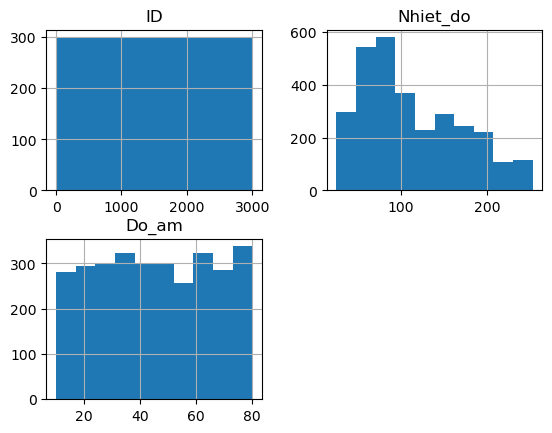

In [5]:
df.hist()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Tách dữ liệu thành các biến đầu vào (X) và biến mục tiêu (y)
X = df[["Ten_do_vat", "Nhiet_do", "Do_am", "trang_thai"]]
y = df['Canh_bao_chay']

# Chuyển đổi biến phân loại thành số
X = pd.get_dummies(X, columns=['Ten_do_vat', 'trang_thai'])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình cây quyết định
model = DecisionTreeClassifier()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# In ra ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



[[112   0]
 [  0 488]]


In [7]:
# Lấy các biến quan trọng từ mô hình
feature_importances = model.feature_importances_

# Tạo một DataFrame để hiển thị các biến và tầm quan trọng của chúng
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sắp xếp các biến theo tầm quan trọng giảm dần
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

                     Feature  Importance
0                   Nhiet_do    0.924943
6    trang_thai_Dang_su_dung    0.057829
1                      Do_am    0.017228
2          Ten_do_vat_Ban_la    0.000000
3         Ten_do_vat_May_say    0.000000
4  Ten_do_vat_Sac_dien_thoai    0.000000
5      trang_thai_Che_do_cho    0.000000
7   trang_thai_Khong_su_dung    0.000000


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tính toán các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Co')
recall = recall_score(y_test, y_pred, pos_label='Co')
f1 = f1_score(y_test, y_pred, pos_label='Co')

# In ra các chỉ số đánh giá
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [9]:
# Dự đoán trên tập kiểm tra
y_pred_test = model.predict(X_test)

# Tính toán các chỉ số đánh giá
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label='Co')
recall_test = recall_score(y_test, y_pred_test, pos_label='Co')
f1_test = f1_score(y_test, y_pred_test, pos_label='Co')

# In ra các chỉ số đánh giá
print(f"Accuracy on test set: {accuracy_test:.2f}")
print(f"Precision on test set: {precision_test:.2f}")
print(f"Recall on test set: {recall_test:.2f}")
print(f"F1 Score on test set: {f1_test:.2f}")

Accuracy on test set: 1.00
Precision on test set: 1.00
Recall on test set: 1.00
F1 Score on test set: 1.00


In [ ]:
# Dữ liệu tự nhập
new_data = {
    'Nhiet_do': [150],
    'Do_am': [20],
    'Ten_do_vat_Ban_la': [False],
    'Ten_do_vat_May_say': [True],
    'Ten_do_vat_Sac_dien_thoai': [False],
    'trang_thai_Che_do_cho': [False],
    'trang_thai_Dang_su_dung': [True],
    'trang_thai_Khong_su_dung': [False]
}
x
# Chuyển đổi thành DataFrame
new_df = pd.DataFrame(new_data)

# Dự đoán với dữ liệu mới
new_prediction = model.predict(new_df)

print(f"Dự đoán cảnh báo cháy: {new_prediction[0]}")

Dự đoán cảnh báo cháy: Co
